# Prática Keras - A casa feliz

Nesse exercício você ira trabalhar no problema "Casa Feliz".



In [ ]:
!git clone https://github.com/filiperobotic/DL_Mestrado.git
!git clone https://github.com/filiperobotic/datasets.git

Cloning into 'DL_Mestrado'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 212 (delta 41), reused 98 (delta 37), pack-reused 103
Receiving objects: 100% (212/212), 5.56 MiB | 28.33 MiB/s, done.
Resolving deltas: 100% (76/76), done.
Cloning into 'datasets'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (10/10), 7.49 MiB | 19.51 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from datasets.kt_utils import *

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


## 1 - A Casa Feliz

Para suas próximas férias, você decidiu passar a semana com 5 amigos. É uma casa muito boa com muitas coisas para fazer por perto. Mas o mais importante benefício é que todo mundo se comprometeu a estar feliz enquanto estiverem na casa. Então, todo mundo que quiser entrar na casa tem que provar o seu estado de alegria.


<img src="https://github.com/filiperobotic/DL_Mestrado/blob/master/imagens/happy-house.jpg?raw=1" style="width:350px;height:270px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **a Casa Feliz**</center></caption>

Como um especialista de deep learning, para assegurar que o estado de "alegria" foi rigorosamente aplicado, você irá desenvolver um algoritmo que usa a foto das pessoas através da câmera da porta de entrada para checar se a pessoa está feliz ou não. A porta deverá abrir apenas se a pessoa estiver feliz!!!
  
Você coletou fotos dos seus amigos e suas, tiradas da câmera da porta de entrara. A base de dados está rotulada.

<img src="https://github.com/filiperobotic/DL_Mestrado/blob/master/imagens/house-members.png?raw=1" style="width:550px;height:250px;">

Execute os seguintes comandos para normalizar a base e observar o formato dela.

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Detalhes da base "Happy" **:
- Imagens são da forma (64,64,3)
- Treinamento: 600 imagens
- Teste: 150 imagens


## 2 - Construindo um modelo no Keras

Keras é muito bom para prototipação rápida. Em apenas poouco tempo é possível construir um modelo que obtém excelentes resultados.

Aqui está um exemplo de modelo no Keras:

```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```



**Exercício**: Implemente o modelo 'HappyModel()'. Sugerimos começar a implementação usando o modelo acima com a arquitetura que sugerimos. Posteriormente, volte e tente variar a arquitetura. Você pode testar outras camadas como AveragePooling2D, Dropout, BatchNormalization.


In [ ]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.

    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input placeholder as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool1')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model


Você contruiu uma função para descrever o modelo. Par atreinar e testar o modelo, são necessários 4 passos no Keras:
1. Criar o modelo chamando a função acima
2. Compilar o modelo chamando  `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Treinar o modelo no conjunto de treino chamando `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Testar o modelo no conjunto de teste chamando `model.evaluate(x = ..., y = ...)`



**Exercício**: Implemente o passo 1 (criar o modelo).

In [ ]:
### START CODE HERE ### (1 line)

happyModel = HappyModel(input_shape=(64, 64, 3))
### END CODE HERE ###


**Exercício**: Implemente o passo2 (compliar o modelo). Escolha os 3 argumentos de `compile()` cuidadosamente. Dica: esse é um problema de classificação binária.

In [ ]:
### START CODE HERE ###
happyModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
### END CODE HERE ###


**Exercício**: Implemente o passo 3 (treinar o modelo). Escolha o número de épocas e o batch size.

In [ ]:
### START CODE HERE ### (1 line)
epochs = 10
batch_size = 32
happyModel.fit(x=X_train, y=Y_train, epochs=epochs, batch_size=batch_size)
### END CODE HERE ###

Epoch 1/10
19/19 [==============================] - 1s 8ms/step - loss: 2.5184 - accuracy: 0.5600
Epoch 2/10
19/19 [==============================] - 0s 8ms/step - loss: 0.4926 - accuracy: 0.8033
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.2436 - accuracy: 0.9050
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.1528 - accuracy: 0.9467
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 0.1600 - accuracy: 0.9367
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.1552 - accuracy: 0.9417
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 0.1179 - accuracy: 0.9583
Epoch 8/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0818 - accuracy: 0.9783
Epoch 9/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0810 - accuracy: 0.9717
Epoch 10/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0533 - accuracy: 0.9867




**Exercício**: Implemente o passo 4. (testar/avaliar o modelo)

In [ ]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(x=X_test, y=Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 5ms/step - loss: 0.2631 - accuracy: 0.9267

Loss = 0.26314273476600647
Test Accuracy = 0.9266666769981384


Se seu  `happyModel()` funcionou, você deverá observar uma acurácia muito melhor que o método aleatório (50%) nons conjuntos de treino e teste. É esperado que você consiga uma acurácia de pelo menos 75%.


**Observação**: Se você realizar ajuste de hiperparâmetro no seu modelo, o conjunto de teste na verdade se torna seu conjunto de validação, e seu modelo pode acabar decorando (overfitting) o conjunto de teste. Mas por enquanto, apenas para fins de exercício, não vamos nos preocupar com isso.


## 3 - Teste com sua própria imagem (Opcional)

Veja se você seria capaz de entrar na casa. Para isso:
    1. Faça o upload da sua imagem
    3. Escreva o caminho dela no código abaixo
    4. Rode o código abaixo e verifique se o algoritmo está certo ( é infeliz, 1 é feliz)!
    


In [ ]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

### START CODE HERE ###
uploaded = files.upload()
img_path = next(iter(uploaded))

### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
fig=plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1, xticks=[], yticks=[])
ax.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))


KeyboardInterrupt: 

## 4 - Use outras funções úteis do Keras (Opcional)


Duas outras funções básicas do Keras são:
- `model.summary()`: imprime os as camadas da rede em uma tabela, com os tamanhos das entradas/saídas
- `plot_model()`: plota um grafo do seu modelo. Você pode salvar em um ".png: usando SVG(). Ele fica salvo em "Arquivos" na barra lateral do notebook.

Rode o seguinte código

In [ ]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn1 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pool1 (MaxPooling2D)    (None, 32, 32, 32)        0         
                                                        

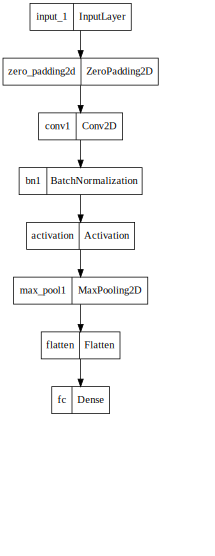

In [ ]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))